### NOTEBOOK CONTENTS:

1. Topic Modelling for Movie Plots
2. Visualization generation for Topics and their terms

In [1]:
%%capture
!pip install contextualized-topic-models
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -U tqdm

After installing above libraries restart runtime and run the cells from below

From the Menu:

Runtime → Restart Runtime 

In [1]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing
import nltk

In [3]:
import pandas as pd
m_meta = pd.read_csv("/content/drive/MyDrive/movies_big/movies_metadata.csv")
m_meta.drop_duplicates(subset=['id'], inplace=True)
m_meta['genres'] = m_meta['genres'].apply(lambda x: eval(x))
m_meta.dropna(subset=['title'], inplace=True)
m_meta['production_companies'] = m_meta['production_companies'].apply(lambda x: eval(x))
m_meta['id'] = m_meta['id'].astype(int)
m_meta.dropna(subset=['imdb_id'], inplace=True)
m_meta['imdbId']=m_meta['imdb_id'].apply(lambda x: int(x.replace("tt", "")))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
m_meta.dropna(subset=['overview'], inplace=True)

In [5]:
m_meta.drop_duplicates(subset=['overview'], inplace=True)

In [6]:
m_meta = m_meta[~m_meta['overview'].apply(lambda x: len(x.split())<5)]

Text Data

In [ ]:
m_meta['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 44209, dtype: object

Preparing inputs from the MODEL

In [41]:
nltk.download('stopwords')

documents = m_meta['overview'].values
sp = WhiteSpacePreprocessing(documents, stopwords_language='english')
preprocessed_documents, unpreprocessed_corpus, vocab = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(m_meta['overview'].values), len(preprocessed_documents), len(unpreprocessed_corpus)

(44209, 44180, 44180)

In [ ]:
# ##exp
# from itertools import chain
# documents = list(chain.from_iterable(m_meta['overview'].apply(lambda x: nltk.sent_tokenize(x)).values))
# sp = WhiteSpacePreprocessing(documents, stopwords_language='english')
# preprocessed_documents, unpreprocessed_corpus, vocab = sp.preprocess()

In [ ]:
#input_df = pd.merge(m_meta[['id','overview']], pd.DataFrame({'overview':unpreprocessed_corpus, 'i':range(len(unpreprocessed_corpus))}), how='outer', )

In [ ]:
#m_meta.shape, len(unpreprocessed_corpus), input_df.shape

In [ ]:
#input_df[input_df['i'].isnull()]

In [ ]:
unpreprocessed_corpus[:2]

["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
 "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."]

Model Training (Contextual Input) - Sentence BERT

In [ ]:
pre_train_model = 'bert-base-nli-mean-tokens'
tp = TopicModelDataPreparation(pre_train_model)

training_dataset = tp.create_training_set(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/221 [00:00<?, ?it/s]

In [ ]:
preprocessed_documents[:2]

['led andy live happily room andy birthday brings onto scene losing place andy heart circumstances separate owner duo eventually learns put',
 'peter discover board game opens door magical world alan adult trapped inside game years living room alan hope freedom game proves three find running giant evil terrifying creatures']

In [ ]:
tp.vocab[:10]

['abandoned',
 'ability',
 'able',
 'abuse',
 'academy',
 'accept',
 'accepts',
 'access',
 'accident',
 'accidentally']

In [ ]:
len(preprocessed_documents)

44180

In [ ]:
m_meta.shape

(44209, 25)

In [ ]:
# ctm = ZeroShotTM(input_size=len(tp.vocab), bert_input_size=768, n_components=20, num_epochs=15)
# ctm.fit(training_dataset) # run the model

In [ ]:
# num_words=10
# for topic, words in enumerate(ctm.get_topic_lists(num_words)):
#     print("Topic:",topic)
#     print(words)
#     print("*****")

In [ ]:
# ctm.get_topic_word_matrix().shape, len(tp.vocab)

In [ ]:
# ctm.get_wordcloud(1, 30)

In [ ]:
# topic_distributions = ctm.get_doc_topic_distribution(ctm.train_data)

In [ ]:
# topic_distributions.shape

Model Training

In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM

In [ ]:
# n_component = Number of Topics
ctm = CombinedTM(input_size=len(tp.vocab), bert_input_size=768, n_components=20, num_epochs=20)

ctm.fit(training_dataset) # run the model


Epoch: [20/20]	 Seen Samples: [883600/883600]	Train Loss: 157.42194315270095	Time: 0:00:12.322178: : 20it [04:03, 12.17s/it]


In [ ]:
num_words=15
for topic, words in enumerate(ctm.get_topic_lists(num_words)):
    print("Topic:",topic)
    print(words)
    print("*****")

Topic: 0
['gang', 'agent', 'police', 'drug', 'cop', 'help', 'prison', 'take', 'get', 'bank', 'money', 'criminal', 'robbery', 'former', 'team']
*****
Topic: 1
['promise', 'rachel', 'simply', 'thirty', 'circus', 'suburban', 'eve', 'lucky', 'seeing', 'wakes', 'bus', 'except', 'tiny', 'spending', 'simon']
*****
Topic: 2
['world', 'film', 'documentary', 'story', 'years', 'history', 'people', 'life', 'interviews', 'american', 'footage', 'us', 'one', 'america', 'today']
*****
Topic: 3
['one', 'man', 'police', 'life', 'murder', 'time', 'years', 'two', 'finds', 'wife', 'day', 'town', 'killer', 'find', 'night']
*****
Topic: 4
['school', 'girl', 'high', 'love', 'college', 'student', 'friends', 'friend', 'get', 'students', 'teacher', 'girls', 'soon', 'gets', 'best']
*****
Topic: 5
['family', 'father', 'son', 'town', 'death', 'home', 'mother', 'house', 'wife', 'daughter', 'young', 'brother', 'dead', 'find', 'old']
*****
Topic: 6
['murder', 'detective', 'police', 'killer', 'serial', 'case', 'investi

In [ ]:
ctm.get_topic_word_matrix().shape, len(tp.vocab)

((20, 1997), 1997)

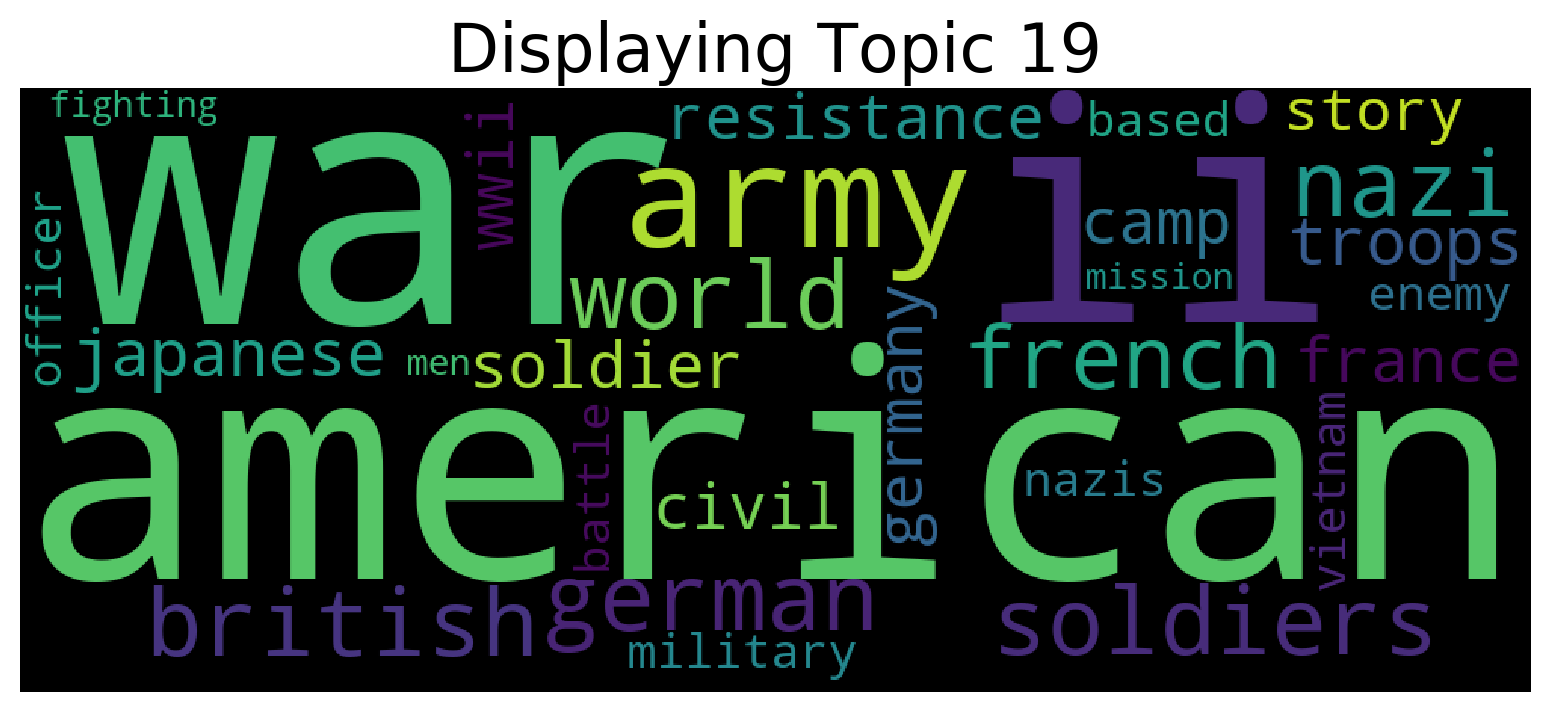

In [ ]:
ctm.get_wordcloud(19, 30)

In [ ]:
# qt = TopicModelDataPreparation("bert-base-nli-mean-tokens")
# testing_dataset = qt.create_test_set(m_meta['overview'].values)

Getting Topic Vectors

In [ ]:
topic_distributions = ctm.get_doc_topic_distribution(ctm.train_data)
topic_distributions.shape

Sampling: [20/20]: : 20it [04:53, 14.70s/it]


(44180, 20)

In [ ]:
len(unpreprocessed_corpus)

44180

In [ ]:
unpreprocessed_corpus[3:5]

['Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive "good man" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.',
 "Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own."]

In [ ]:
temp_df = pd.DataFrame({'overview':unpreprocessed_corpus})
temp_df = pd.merge(temp_df, m_meta[['id', 'overview']], how='left')

In [ ]:
import joblib

In [ ]:
joblib.dump(temp_df['id'].values, "/content/drive/MyDrive/movies_big/topic/m_ids.pkl")
joblib.dump(topic_distributions, "/content/drive/MyDrive/movies_big/topic/topic_vectors.pkl")

['/content/drive/MyDrive/movies_big/topic/topic_vectors.pkl']

In [ ]:
joblib.dump(ctm, "/content/drive/MyDrive/movies_big/topic/ctm.pkl")

['/content/drive/MyDrive/movies_big/topic/ctm.pkl']

Visualization

In [8]:
import joblib

In [9]:
doc_topic_disb = joblib.load("/content/drive/MyDrive/movies_big/topic/topic_vectors.pkl")

In [10]:
ctm = joblib.load("/content/drive/MyDrive/movies_big/topic/ctm.pkl")

In [23]:
topic_term_disb = ctm.get_topic_word_distribution()

In [53]:
vocab = sorted([v[0] for v in ctm.get_word_distribution_by_topic_id(1)])

In [37]:
doc_topic_disb.shape, topic_term_disb.shape,len(vocab)

((44180, 20), (20, 1997), 1997)

In [45]:
preprocessed_documents[0]

'led andy live happily room andy birthday brings onto scene losing place andy heart circumstances separate owner duo eventually learns put'

In [48]:
doc_lens = list(map(lambda x: len(x.split(" ")), preprocessed_documents))
len(doc_lens)

44180

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
!pip install pyldavis
import pyLDAvis

In [55]:
cv = CountVectorizer(vocabulary=vocab)
mat = cv.fit_transform(preprocessed_documents)

In [64]:
tf = np.array(np.sum(mat, axis=0)).flatten()

In [67]:
movies_vis_data = pyLDAvis.prepare(topic_term_dists=topic_term_disb,
                                   doc_topic_dists=doc_topic_disb,vocab = vocab,doc_lengths = doc_lens, term_frequency=tf, sort_topics=False, start_index=0)

In [70]:
pyLDAvis.save_html(movies_vis_data, "/content/drive/MyDrive/movies_big/emb/topic_model_viz.html")

In [69]:
pyLDAvis.display(movies_vis_data)